In [222]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from math import *
from time import *

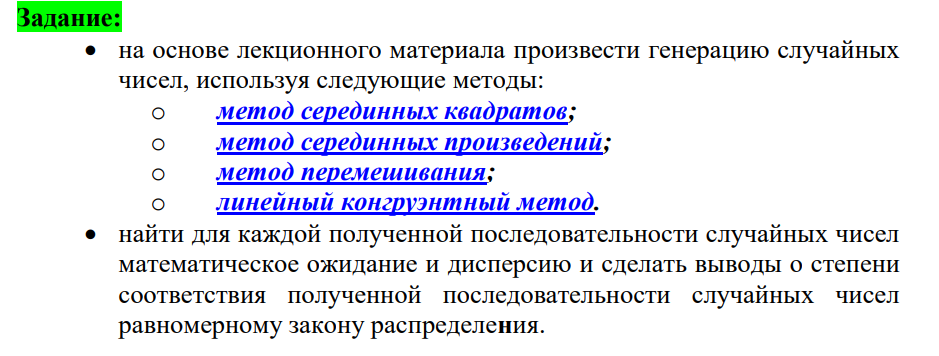

## Метод серединных квадратов

In [223]:
R0 = 2345 #int(input("Четырехзначное число"))
R1 = list(map(lambda x: int(x) ,list(str(R0**2))))
R2 = R1[2:6]
# str(R0**2).split()
print(R1,(len(R1)%4)//2+1,-(len(R1)%4-2))
R2

[5, 4, 9, 9, 0, 2, 5] 2 -1


[9, 9, 0, 2]

In [ ]:
seed_number = int(input("Введите число из 4 цифр:\n[####] "))
number = seed_number
already_seen = set()
counter = 0
for_stats = []
while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = int(str(number * number).zfill(8)[2:6])
    print(f"#{counter}: {number} {number*number}")
    for_stats.append(number)
MX = sum(for_stats)/len(for_stats)
# DX = len(for_stats)*sum(map(lambda x: x**2, for_stats)) - sum(for_stats)**2
DX = sum([(i - MX)**2 for i in for_stats])/len(for_stats)

print(f"Мы начали с числа {seed_number} и"
      f" повторились через {counter} шагов"
      f" с числом {number}.")

### Матожидание и Дисперсия

In [160]:
print(MX,DX)

36027986252.4 3.6572710964263046e+21


## __Метод серединных произведений__
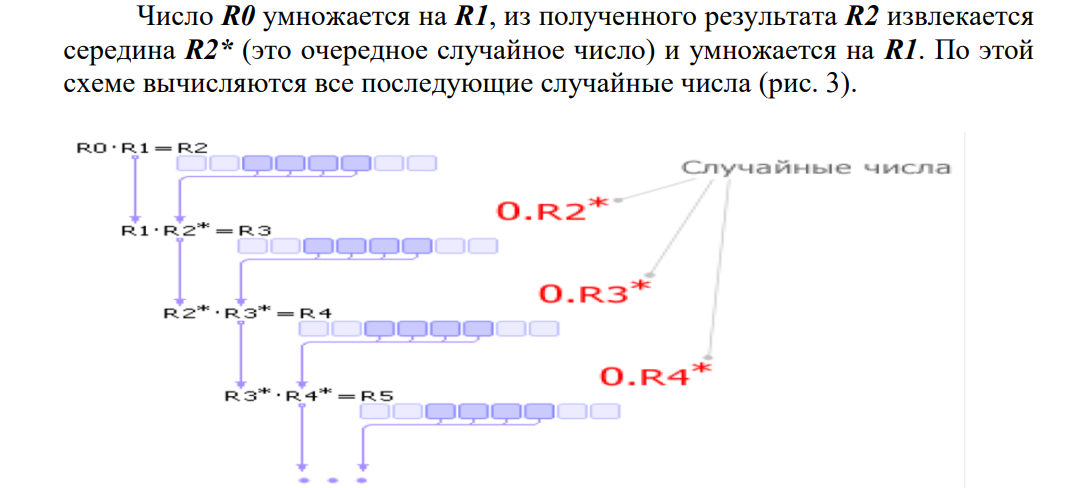

In [ ]:
seed_number = int(input("Введите число из 4 цифр:\n[####] "))
seed_number1 = int(input("Введите второе число из 4 цифр:\n[####] "))
num = [seed_number,seed_number1]
already_seen = set()
counter = 0

while num[-1] not in already_seen:
    counter += 1
    already_seen.add(number)
    number = int(str(num[-1] * num[-2]).zfill(8)[2:6])
    num.append(number)
    print(f"#{counter}: {num[-1]} {num[-2]}")

MX = sum(num)/len(num)
DX = sum([(i - MX)**2 for i in num])/len(num)

print(f"Мы начали с числа {seed_number} и"
      f" повторились через {counter} шагов"
      f" с числом {number}.")

## Дисперсия и Матожидание

In [162]:
print(MX,DX)

36027986252.4 3.6572710964263046e+21


## Метод перемешивания

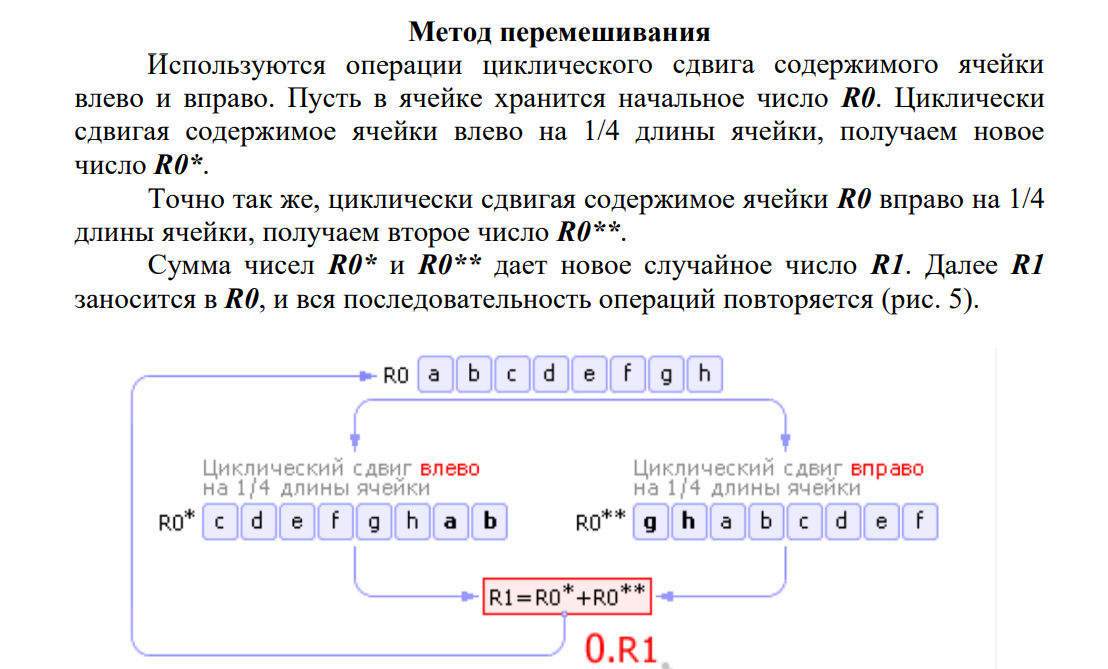

In [163]:
from collections import *

In [164]:
def to_num(r):
    n = len(r)-1
    m = 0
    for i in r:
        m+=i*10**n
        n-=1
    # print(f"nn {m}")

    return m


def back_to_deque(n):
    R = deque(list(map(lambda x: int(x), str(n))))
    # print(f"DD {R}")
    return R.copy()

In [216]:
R0 = deque([1,2,3,4,5,6,7,8])
R0C = R0.copy()
for_stats = []
n = 5
for i in range(1,n+1):
    R0.rotate(-len(R0)//4)
    print(R0)
    R0C.rotate(len(R0)//4)
    print(R0C)
    R0 = back_to_deque(to_num(R0.copy())+to_num(R0C.copy()))
    R0C = R0.copy()
    for_stats.append(to_num(R0.copy()))
    print(f"#{i} {R0}")

deque([3, 4, 5, 6, 7, 8, 1, 2])
deque([7, 8, 1, 2, 3, 4, 5, 6])
#1 deque([1, 1, 2, 6, 9, 1, 2, 6, 8])
deque([6, 9, 1, 2, 6, 8, 1, 1, 2])
deque([6, 8, 1, 1, 2, 6, 9, 1, 2])
#2 deque([1, 3, 7, 2, 3, 9, 5, 0, 2, 4])
deque([2, 3, 9, 5, 0, 2, 4, 1, 3, 7])
deque([2, 4, 1, 3, 7, 2, 3, 9, 5, 0])
#3 deque([4, 8, 0, 8, 7, 4, 8, 0, 8, 7])
deque([8, 7, 4, 8, 0, 8, 7, 4, 8, 0])
deque([8, 7, 4, 8, 0, 8, 7, 4, 8, 0])
#4 deque([1, 7, 4, 9, 6, 1, 7, 4, 9, 6, 0])
deque([9, 6, 1, 7, 4, 9, 6, 0, 1, 7, 4])
deque([6, 0, 1, 7, 4, 9, 6, 1, 7, 4, 9])
#5 deque([1, 5, 6, 3, 4, 9, 9, 2, 1, 9, 2, 3])


In [218]:
print(f"All {for_stats}")
MX = sum(for_stats)/len(for_stats)
# DX = len(for_stats)*sum(map(lambda x: x**2, for_stats)) - sum(for_stats)**2
DX = sum([(i - MX)**2 for i in for_stats])/len(for_stats)
print(f"Матожидание {MX}")
print(f"Дисперсия {DX}")

All [112691268, 1372395024, 4808748087, 17496174960, 156349921923]
Матожидание 36027986252.4
Дисперсия 3.6572710964263046e+21


## Линейный конгруэнтный метод
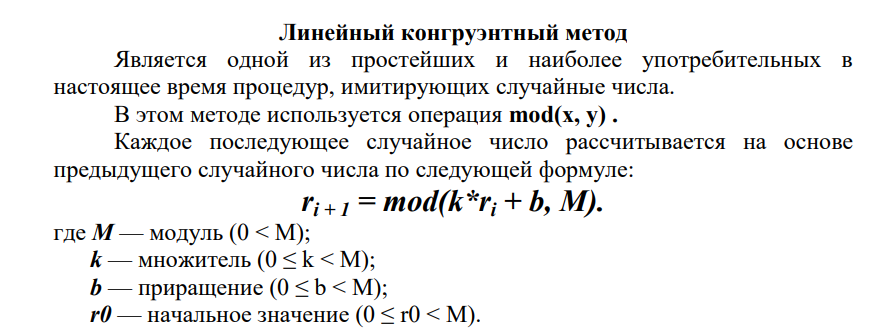

In [212]:
import time 

In [213]:
m=2147483647
a=1220703125
b=7

def lin_rand_arr_flxd(seed,size):
    if size==1:
        return ceil(fmod(a*ceil(seed)+b,m))
    r=[0 for i in range(size)]
    r[0]=ceil(seed)
    for i in range(1,size):
        r[i]=ceil(fmod((a*r[i-1]+b),m))
    return r[1:size]
fore = lin_rand_arr_flxd(7,13)
print(fore)

[2102470941, 2095774539, 293529164, 534389740, 856491030, 1964647199, 2114713372, 668376820, 1155489451, 1782919420, 715592546, 964039844]


In [214]:
MX = sum(fore)/len(fore)
# DX = len(for_stats)*sum(map(lambda x: x**2, for_stats)) - sum(for_stats)**2
DX = sum([(i - MX)**2 for i in fore])/len(fore)

In [215]:
print(f"Матожидание {MX}")
print(f"Дисперсия {DX}")

Матожидание 1270702838.8333333
Дисперсия 4.3964308729253664e+17
